Shape of data: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

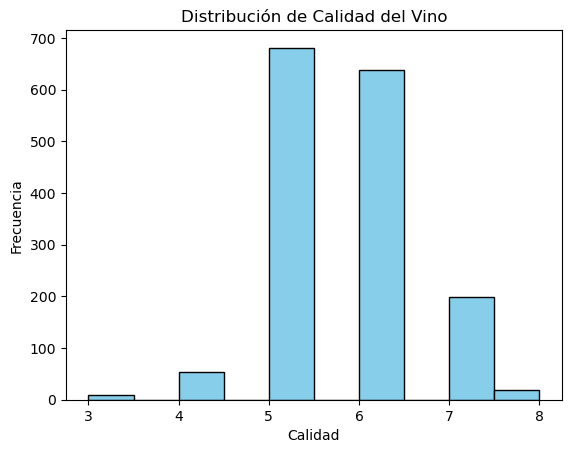

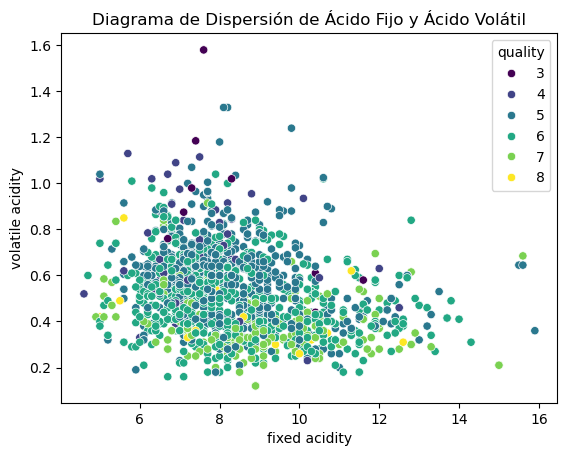

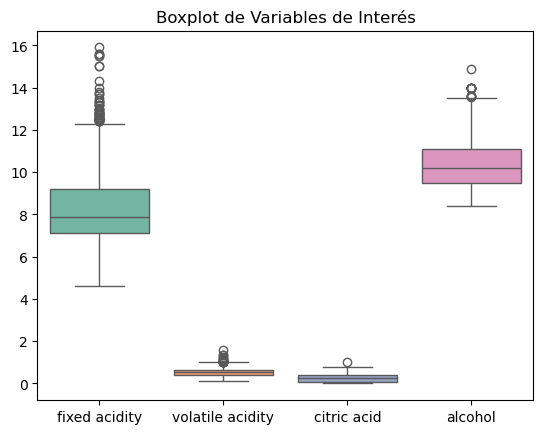

In [ ]:
# Paso 1: Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Paso 2: Cargamos el dataset y mostramos las primeras filas
ruta = r"C:\DATASET\Calidad_Vino.csv"
data = pd.read_csv(ruta)

# Seleccionamos las variables relevantes
data = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
             'alcohol', 'quality']]

# Verificamos la estructura de los datos
print("Shape of data:", data.shape)
print(data.head())
print(data.describe())
print("Valores nulos por columna:\n", data.isna().sum())

# Paso 3: Visualización
# Histograma de la variable objetivo 'quality'
plt.hist(data['quality'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de dispersión: Ácido fijo vs Ácido volátil
sns.scatterplot(x="fixed acidity", y="volatile acidity", hue="quality", data=data, palette="viridis")
plt.title("Diagrama de Dispersión de Ácido Fijo y Ácido Volátil")
plt.show()

# Boxplot de variables clave
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']], palette="Set2")
plt.title("Boxplot de Variables de Interés")
plt.show()

# Paso 4: Preparamos las variables predictoras y la variable objetivo
X = data.drop('quality', axis=1)  # Variables predictoras
y = data['quality']               # Variable objetivo

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamos el modelo de Árbol de Decisión
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

# Visualizamos el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.show()

# Paso 6: Evaluación del modelo
predicciones = arbol.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, predicciones)
precision = precision_score(y_test, predicciones, average='weighted')
recall = recall_score(y_test, predicciones, average='weighted')
f1 = f1_score(y_test, predicciones, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
